In [34]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# 윈저사이저 적용
df1 = pd.read_csv('./Elastic_sampling_ENN.csv',encoding='CP949')
df2 = pd.read_csv('./label지정.csv', encoding='cp949')

for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.01)

df1.columns

Index(['[제조]유동자산구성비율', '[제조]순운전자본회전률', '[제조]매입채무회전기간', '[제조]부채비율',
       '[제조]매출채권회전률', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률',
       '[제조]자본분배율', 'year', 'label'],
      dtype='object')

In [36]:

df2 =df2.reset_index(drop="index")
df2.describe()

,거래소코드,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,1.066200e+04,10662.000000,...,1.066200e+04,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,1.066200e+04,10662.000000,10662.0,10662.000000
mean,92074.287188,4.993341,28.056523,84.564483,21.639397,13.746344,22.626214,17.352542,6.212778e+02,87.858023,...,1.485140e+06,10.562375,111.876595,-23.525442,-73.331389,14.732072,1.894793e+05,2015.869818,12.0,0.015757
std,106083.269592,0.354335,1454.454305,3093.493880,129.847723,51.742527,354.943960,82.628720,6.254670e+04,3275.800579,...,5.170670e+07,224.658324,1419.551265,1418.995549,2107.927519,102.169681,1.369595e+07,2.882518,0.0,0.124539
min,250.000000,4.000000,-100.000000,-100.000000,-99.470000,-95.840000,-1068.120000,-98.810000,-1.522079e+05,-99.970000,...,-2.657909e+09,-13958.620000,0.000000,-116701.060000,-190075.340000,0.000000,-4.493653e+06,2011.000000,12.0,0.000000
25%,39240.000000,5.000000,-9.657500,-5.257500,-4.167500,-3.217500,-1.920000,-8.830000,-3.159750e+01,-11.220000,...,7.957000e+01,12.020000,38.280000,2.385000,-0.297500,1.660000,-6.875000e-01,2013.000000,12.0,0.000000
50%,65950.000000,5.000000,4.300000,1.440000,4.485000,5.520000,5.870000,5.535000,0.000000e+00,0.000000,...,2.685100e+02,21.785000,57.065000,35.020000,10.985000,3.030000,2.470000e+00,2016.000000,12.0,0.000000
75%,105330.000000,5.000000,19.100000,17.970000,21.067500,17.827500,17.110000,23.542500,3.889500e+01,22.117500,...,1.303918e+03,34.447500,76.037500,52.097500,28.827500,6.407500,1.707750e+01,2018.000000,12.0,0.000000
max,950200.000000,6.000000,149805.530000,295498.650000,7919.440000,2579.670000,34640.710000,4274.050000,6.452079e+06,313488.540000,...,1.418999e+09,2377.220000,116801.060000,99.180000,3373.680000,6295.580000,1.000000e+09,2020.000000,12.0,1.000000


In [37]:
# train test set 분리
df1  #train 
df2 = df2[df2['year']>=2019]  #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]유동자산구성비율','[제조]순운전자본회전률','[제조]매입채무회전기간',
'[제조]부채비율','[제조]매출채권회전률','[제조]비유동자산증가율','[제조]매출액순이익률','[제조]자기자본순이익률','[제조]자본분배율']]
X_test = df2[['[제조]유동자산구성비율','[제조]순운전자본회전률','[제조]매입채무회전기간',
'[제조]부채비율','[제조]매출채권회전률','[제조]비유동자산증가율','[제조]매출액순이익률','[제조]자기자본순이익률','[제조]자본분배율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]유동자산구성비율,[제조]순운전자본회전률,[제조]매입채무회전기간,[제조]부채비율,[제조]매출채권회전률,[제조]비유동자산증가율,[제조]매출액순이익률,[제조]자기자본순이익률,[제조]자본분배율
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,53.098029,0.928298,30.777717,112.259077,10.964246,27.811356,-53.778948,-9.227491,-14.308633
std,19.038670,0.569136,38.809046,551.642261,39.041133,197.025693,655.393621,85.528816,558.760451
min,2.200000,0.000000,0.000000,0.000000,0.000000,-93.710000,-22244.140000,-3342.120000,-22135.240000
25%,39.830000,0.550000,11.675000,27.525000,4.340000,-4.185000,-9.990000,-10.490000,0.000000
50%,53.200000,0.870000,23.170000,59.770000,6.440000,5.370000,1.830000,2.320000,31.250000
75%,66.710000,1.210000,38.725000,115.750000,10.185000,23.640000,8.605000,9.570000,50.870000
max,99.110000,6.910000,558.620000,25729.810000,1294.310000,7919.440000,2096.990000,154.560000,96.010000


In [38]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [41]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 6, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.962


In [42]:
  
#최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 3,min_samples_leaf=6)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [43]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [45]:
# # 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                 'max_depth': [2,4,6,8],
#                 'max_features': ['auto', 'sqrt'],
#                 'min_samples_leaf': [4,6,8.10],
#                 'min_samples_split': [4,6,8,10],
#                 'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                 cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 40}, 최적 평균 정확도 :0.970


In [46]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 
#               'min_samples_split': 10, 'n_estimators': 40}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'sqrt',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=40)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

In [47]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


In [48]:
#로지스틱 회귀 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {'penalty': ['l2','l1','elasticnet','None'],
#           'C':[0.01,0.1,1,1,5,10]}

# grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train,y_train)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.954


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\82104\AppData\Local\Progra

In [49]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

In [50]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [51]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    
    

1
0.7257499026100507
2
0.806388780677834
3
0.7806778340475263
4
0.819244253992988
5
0.8044409816906896
6
0.8324892871055707
7
0.823139851967277
8
0.84339696143358
9
0.8359953252824308
10
0.8507985975847293


In [52]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [53]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]유동자산구성비율','[제조]순운전자본회전률','[제조]매입채무회전기간',
'[제조]부채비율','[제조]매출채권회전률','[제조]비유동자산증가율','[제조]매출액순이익률','[제조]자기자본순이익률','[제조]자본분배율']]
X_train_XG.columns = [['유동자산구성비율','순운전자본회전률','매입채무회전기간',
'부채비율','매출채권회전률','비유동자산증가율','매출액순이익률','자기자본순이익률','자본분배율']]
X_test_XG = df2[['[제조]유동자산구성비율','[제조]순운전자본회전률','[제조]매입채무회전기간',
'[제조]부채비율','[제조]매출채권회전률','[제조]비유동자산증가율','[제조]매출액순이익률','[제조]자기자본순이익률','[제조]자본분배율']]
X_test_XG.columns =[['유동자산구성비율','순운전자본회전률','매입채무회전기간',
'부채비율','매출채권회전률','비유동자산증가율','매출액순이익률','자기자본순이익률','자본분배율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:07:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [69]:
# xgb부스트 최적의 파라미터
# 최적 하이퍼 파라미어:{'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 100}, 최적 평균 정확도:0.974
xgb_wrapper = XGBClassifier(learning_rate= 0.07, max_depth= 6, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [71]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score

# pc_scores = []
# for i in range(1,11):
#     pc_clf = Perceptron(n_iter=i)
#     pc_clf.fit(X_train, y_train)
#     pc_pred = pc_clf.predict(X_test)
    
#     pc_scores=accuracy_score(y_test, pc_pred)
#     print(i)
#     print(pc_scores)


In [58]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 7)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [72]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2118  419]
 [  11   19]]
정확도: 0.8325, 정밀도 : 0.0434, 재현율:0.6333,F1 스코어:0.0812
ROC 스코어: 0.7341, PR score : 0.0318
None
디시전트리
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
None
디시전트리 최적의 모델
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.7829, PR score : 0.0289
None
랜덤포레스트
오차행렬
[[1579  958]
 [   3   27]]
정확도: 0.6256, 정밀도 : 0.0274, 재현율:0.9000,F1 스코어:0.0532
ROC 스코어: 0.7612, PR score : 0.0258
None
랜덤포레스트 최적의 모델
오차행렬
[[1624  913]
 [   3   27]]
정확도: 0.6432, 정밀도 : 0.0287, 재현율:0.9000,F1 스코어:0.0557
ROC 스코어: 0.7701, PR score : 0.0270
None
로지스틱
오차행렬
[[1834  703]
 [   5   25]]
정확도: 0.7242, 정밀도 : 0.0343, 재현율:0.8333,F1 스코어:0.0660
ROC 스코어: 0.7781, PR score : 0.0306
None
로지스틱회귀 최적의 모델
오차행렬
[[1860  677]
 [   6   24]]
정확도: 0.7339, 정밀도 : 0.0342, 재현율:0.8000,F1 스코어:0.0657
ROC 스코어: 0.7666, PR score : 0.0297
None
Knn
오차행렬
[[2165  372]
 [  11   19]]
정확도: 0.8508, 정밀도 : 0.0486, 재현율:0.

In [73]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
  
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[1870  667]
 [   6   24]]
정확도: 0.7378, 정밀도 : 0.0347, 재현율:0.8000,F1 스코어:0.0666
ROC 스코어: 0.7685, PR score : 0.0301
임곗값: 0.2
오차행렬
[[1975  562]
 [   8   22]]
정확도: 0.7780, 정밀도 : 0.0377, 재현율:0.7333,F1 스코어:0.0717
ROC 스코어: 0.7559, PR score : 0.0307
임곗값: 0.3
오차행렬
[[2035  502]
 [   8   22]]
정확도: 0.8013, 정밀도 : 0.0420, 재현율:0.7333,F1 스코어:0.0794
ROC 스코어: 0.7677, PR score : 0.0339
임곗값: 0.4
오차행렬
[[2082  455]
 [  10   20]]
정확도: 0.8189, 정밀도 : 0.0421, 재현율:0.6667,F1 스코어:0.0792
ROC 스코어: 0.7437, PR score : 0.0320
임곗값: 0.5
오차행렬
[[2118  419]
 [  11   19]]
정확도: 0.8325, 정밀도 : 0.0434, 재현율:0.6333,F1 스코어:0.0812
ROC 스코어: 0.7341, PR score : 0.0318
임곗값: 0.6
오차행렬
[[2157  380]
 [  12   18]]
정확도: 0.8473, 정밀도 : 0.0452, 재현율:0.6000,F1 스코어:0.0841
ROC 스코어: 0.7251, PR score : 0.0318
임곗값: 0.7
오차행렬
[[2191  346]
 [  12   18]]
정확도: 0.8605, 정밀도 : 0.0495, 재현율:0.6000,F1 스코어:0.0914
ROC 스코어: 0.7318, PR score : 0.0343
임곗값: 0.8
오차행렬
[[2232  305]
 [  12   18]]
정확도: 0.8765, 정밀도 : 0.0557, 재현율:0.6000,F1 스코어:0.1020
ROC 스코어: 0.

In [74]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.2
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.3
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.4
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.5
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.6
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.7
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.7281, PR score : 0.0216
임곗값: 0.8
오차행렬
[[1242 1295]
 [   1   29]]
정확도: 0.4951, 정밀도 : 0.0219, 재현율:0.9667,F1 스코어:0.0428
ROC 스코어: 0.

In [75]:
# 디시전트리 최적

get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1585  952]
 [   3   27]]
정확도: 0.6280, 정밀도 : 0.0276, 재현율:0.9000,F1 스코어:0.0535
ROC 스코어: 0.7624, PR score : 0.0260
임곗값: 0.2
오차행렬
[[1585  952]
 [   3   27]]
정확도: 0.6280, 정밀도 : 0.0276, 재현율:0.9000,F1 스코어:0.0535
ROC 스코어: 0.7624, PR score : 0.0260
임곗값: 0.3
오차행렬
[[1585  952]
 [   3   27]]
정확도: 0.6280, 정밀도 : 0.0276, 재현율:0.9000,F1 스코어:0.0535
ROC 스코어: 0.7624, PR score : 0.0260
임곗값: 0.4
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.7829, PR score : 0.0289
임곗값: 0.5
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.7829, PR score : 0.0289
임곗값: 0.6
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.7829, PR score : 0.0289
임곗값: 0.7
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.7829, PR score : 0.0289
임곗값: 0.8
오차행렬
[[1689  848]
 [   3   27]]
정확도: 0.6685, 정밀도 : 0.0309, 재현율:0.9000,F1 스코어:0.0597
ROC 스코어: 0.

In [76]:
#로지스틱 회귀

get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1233 1304]
 [   2   28]]
정확도: 0.4912, 정밀도 : 0.0210, 재현율:0.9333,F1 스코어:0.0411
ROC 스코어: 0.7097, PR score : 0.0204
임곗값: 0.2
오차행렬
[[1512 1025]
 [   4   26]]
정확도: 0.5991, 정밀도 : 0.0247, 재현율:0.8667,F1 스코어:0.0481
ROC 스코어: 0.7313, PR score : 0.0230
임곗값: 0.3
오차행렬
[[1661  876]
 [   4   26]]
정확도: 0.6572, 정밀도 : 0.0288, 재현율:0.8667,F1 스코어:0.0558
ROC 스코어: 0.7607, PR score : 0.0265
임곗값: 0.4
오차행렬
[[1771  766]
 [   5   25]]
정확도: 0.6996, 정밀도 : 0.0316, 재현율:0.8333,F1 스코어:0.0609
ROC 스코어: 0.7657, PR score : 0.0283
임곗값: 0.5
오차행렬
[[1834  703]
 [   5   25]]
정확도: 0.7242, 정밀도 : 0.0343, 재현율:0.8333,F1 스코어:0.0660
ROC 스코어: 0.7781, PR score : 0.0306
임곗값: 0.6
오차행렬
[[1896  641]
 [   6   24]]
정확도: 0.7480, 정밀도 : 0.0361, 재현율:0.8000,F1 스코어:0.0691
ROC 스코어: 0.7737, PR score : 0.0312
임곗값: 0.7
오차행렬
[[1951  586]
 [   7   23]]
정확도: 0.7690, 정밀도 : 0.0378, 재현율:0.7667,F1 스코어:0.0720
ROC 스코어: 0.7678, PR score : 0.0317
임곗값: 0.8
오차행렬
[[2014  523]
 [   8   22]]
정확도: 0.7931, 정밀도 : 0.0404, 재현율:0.7333,F1 스코어:0.0765
ROC 스코어: 0.

In [77]:
# 로지 회귀 최적 파라미터

get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1249 1288]
 [   3   27]]
정확도: 0.4971, 정밀도 : 0.0205, 재현율:0.9000,F1 스코어:0.0401
ROC 스코어: 0.6962, PR score : 0.0196
임곗값: 0.2
오차행렬
[[1529 1008]
 [   5   25]]
정확도: 0.6054, 정밀도 : 0.0242, 재현율:0.8333,F1 스코어:0.0470
ROC 스코어: 0.7180, PR score : 0.0221
임곗값: 0.3
오차행렬
[[1693  844]
 [   5   25]]
정확도: 0.6693, 정밀도 : 0.0288, 재현율:0.8333,F1 스코어:0.0556
ROC 스코어: 0.7503, PR score : 0.0259
임곗값: 0.4
오차행렬
[[1798  739]
 [   6   24]]
정확도: 0.7098, 정밀도 : 0.0315, 재현율:0.8000,F1 스코어:0.0605
ROC 스코어: 0.7544, PR score : 0.0275
임곗값: 0.5
오차행렬
[[1860  677]
 [   6   24]]
정확도: 0.7339, 정밀도 : 0.0342, 재현율:0.8000,F1 스코어:0.0657
ROC 스코어: 0.7666, PR score : 0.0297
임곗값: 0.6
오차행렬
[[1908  629]
 [   8   22]]
정확도: 0.7519, 정밀도 : 0.0338, 재현율:0.7333,F1 스코어:0.0646
ROC 스코어: 0.7427, PR score : 0.0279
임곗값: 0.7
오차행렬
[[1971  566]
 [   8   22]]
정확도: 0.7764, 정밀도 : 0.0374, 재현율:0.7333,F1 스코어:0.0712
ROC 스코어: 0.7551, PR score : 0.0306
임곗값: 0.8
오차행렬
[[2032  505]
 [   8   22]]
정확도: 0.8002, 정밀도 : 0.0417, 재현율:0.7333,F1 스코어:0.0790
ROC 스코어: 0.

In [78]:
#랜덤 포레스트

get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[ 974 1563]
 [   1   29]]
정확도: 0.3907, 정밀도 : 0.0182, 재현율:0.9667,F1 스코어:0.0358
ROC 스코어: 0.6753, PR score : 0.0180
임곗값: 0.2
오차행렬
[[1204 1333]
 [   1   29]]
정확도: 0.4803, 정밀도 : 0.0213, 재현율:0.9667,F1 스코어:0.0417
ROC 스코어: 0.7206, PR score : 0.0210
임곗값: 0.3
오차행렬
[[1352 1185]
 [   2   28]]
정확도: 0.5376, 정밀도 : 0.0231, 재현율:0.9333,F1 스코어:0.0451
ROC 스코어: 0.7331, PR score : 0.0223
임곗값: 0.4
오차행렬
[[1459 1078]
 [   2   28]]
정확도: 0.5793, 정밀도 : 0.0253, 재현율:0.9333,F1 스코어:0.0493
ROC 스코어: 0.7542, PR score : 0.0244
임곗값: 0.5
오차행렬
[[1579  958]
 [   3   27]]
정확도: 0.6256, 정밀도 : 0.0274, 재현율:0.9000,F1 스코어:0.0532
ROC 스코어: 0.7612, PR score : 0.0258
임곗값: 0.6
오차행렬
[[1658  879]
 [   4   26]]
정확도: 0.6560, 정밀도 : 0.0287, 재현율:0.8667,F1 스코어:0.0556
ROC 스코어: 0.7601, PR score : 0.0265
임곗값: 0.7
오차행렬
[[1713  824]
 [   4   26]]
정확도: 0.6774, 정밀도 : 0.0306, 재현율:0.8667,F1 스코어:0.0591
ROC 스코어: 0.7709, PR score : 0.0281
임곗값: 0.8
오차행렬
[[1762  775]
 [   4   26]]
정확도: 0.6965, 정밀도 : 0.0325, 재현율:0.8667,F1 스코어:0.0626
ROC 스코어: 0.

In [79]:
# 랜덤 포레스트 최적 파라미터 

get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 908 1629]
 [   1   29]]
정확도: 0.3650, 정밀도 : 0.0175, 재현율:0.9667,F1 스코어:0.0344
ROC 스코어: 0.6623, PR score : 0.0173
임곗값: 0.2
오차행렬
[[1275 1262]
 [   1   29]]
정확도: 0.5080, 정밀도 : 0.0225, 재현율:0.9667,F1 스코어:0.0439
ROC 스코어: 0.7346, PR score : 0.0221
임곗값: 0.3
오차행렬
[[1453 1084]
 [   2   28]]
정확도: 0.5769, 정밀도 : 0.0252, 재현율:0.9333,F1 스코어:0.0490
ROC 스코어: 0.7530, PR score : 0.0243
임곗값: 0.4
오차행렬
[[1561  976]
 [   2   28]]
정확도: 0.6190, 정밀도 : 0.0279, 재현율:0.9333,F1 스코어:0.0542
ROC 스코어: 0.7743, PR score : 0.0268
임곗값: 0.5
오차행렬
[[1624  913]
 [   3   27]]
정확도: 0.6432, 정밀도 : 0.0287, 재현율:0.9000,F1 스코어:0.0557
ROC 스코어: 0.7701, PR score : 0.0270
임곗값: 0.6
오차행렬
[[1676  861]
 [   4   26]]
정확도: 0.6630, 정밀도 : 0.0293, 재현율:0.8667,F1 스코어:0.0567
ROC 스코어: 0.7636, PR score : 0.0270
임곗값: 0.7
오차행렬
[[1722  815]
 [   4   26]]
정확도: 0.6810, 정밀도 : 0.0309, 재현율:0.8667,F1 스코어:0.0597
ROC 스코어: 0.7727, PR score : 0.0284
임곗값: 0.8
오차행렬
[[1923  614]
 [   6   24]]
정확도: 0.7585, 정밀도 : 0.0376, 재현율:0.8000,F1 스코어:0.0719
ROC 스코어: 0.

In [80]:
#knn 

get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 224 2313]
 [   1   29]]
정확도: 0.0986, 정밀도 : 0.0124, 재현율:0.9667,F1 스코어:0.0245
ROC 스코어: 0.5275, PR score : 0.0124
임곗값: 0.2
오차행렬
[[ 392 2145]
 [   1   29]]
정확도: 0.1640, 정밀도 : 0.0133, 재현율:0.9667,F1 스코어:0.0263
ROC 스코어: 0.5606, PR score : 0.0133
임곗값: 0.3
오차행렬
[[ 392 2145]
 [   1   29]]
정확도: 0.1640, 정밀도 : 0.0133, 재현율:0.9667,F1 스코어:0.0263
ROC 스코어: 0.5606, PR score : 0.0133
임곗값: 0.4
오차행렬
[[ 551 1986]
 [   1   29]]
정확도: 0.2259, 정밀도 : 0.0144, 재현율:0.9667,F1 스코어:0.0284
ROC 스코어: 0.5919, PR score : 0.0143
임곗값: 0.5
오차행렬
[[ 551 1986]
 [   1   29]]
정확도: 0.2259, 정밀도 : 0.0144, 재현율:0.9667,F1 스코어:0.0284
ROC 스코어: 0.5919, PR score : 0.0143
임곗값: 0.6
오차행렬
[[ 648 1889]
 [   1   29]]
정확도: 0.2637, 정밀도 : 0.0151, 재현율:0.9667,F1 스코어:0.0298
ROC 스코어: 0.6110, PR score : 0.0150
임곗값: 0.7
오차행렬
[[ 648 1889]
 [   1   29]]
정확도: 0.2637, 정밀도 : 0.0151, 재현율:0.9667,F1 스코어:0.0298
ROC 스코어: 0.6110, PR score : 0.0150
임곗값: 0.8
오차행렬
[[ 784 1753]
 [   1   29]]
정확도: 0.3167, 정밀도 : 0.0163, 재현율:0.9667,F1 스코어:0.0320
ROC 스코어: 0.

In [81]:
# knn 최적 파라미터 적용

get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 177 2360]
 [   1   29]]
정확도: 0.0802, 정밀도 : 0.0121, 재현율:0.9667,F1 스코어:0.0240
ROC 스코어: 0.5182, PR score : 0.0121
임곗값: 0.2
오차행렬
[[ 333 2204]
 [   1   29]]
정확도: 0.1410, 정밀도 : 0.0130, 재현율:0.9667,F1 스코어:0.0256
ROC 스코어: 0.5490, PR score : 0.0129
임곗값: 0.3
오차행렬
[[ 501 2036]
 [   1   29]]
정확도: 0.2065, 정밀도 : 0.0140, 재현율:0.9667,F1 스코어:0.0277
ROC 스코어: 0.5821, PR score : 0.0140
임곗값: 0.4
오차행렬
[[ 501 2036]
 [   1   29]]
정확도: 0.2065, 정밀도 : 0.0140, 재현율:0.9667,F1 스코어:0.0277
ROC 스코어: 0.5821, PR score : 0.0140
임곗값: 0.5
오차행렬
[[ 590 1947]
 [   1   29]]
정확도: 0.2411, 정밀도 : 0.0147, 재현율:0.9667,F1 스코어:0.0289
ROC 스코어: 0.5996, PR score : 0.0146
임곗값: 0.6
오차행렬
[[ 690 1847]
 [   1   29]]
정확도: 0.2801, 정밀도 : 0.0155, 재현율:0.9667,F1 스코어:0.0304
ROC 스코어: 0.6193, PR score : 0.0153
임곗값: 0.7
오차행렬
[[ 690 1847]
 [   1   29]]
정확도: 0.2801, 정밀도 : 0.0155, 재현율:0.9667,F1 스코어:0.0304
ROC 스코어: 0.6193, PR score : 0.0153
임곗값: 0.8
오차행렬
[[ 783 1754]
 [   1   29]]
정확도: 0.3163, 정밀도 : 0.0163, 재현율:0.9667,F1 스코어:0.0320
ROC 스코어: 0.

In [82]:
#xgb 

get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1126 1411]
 [   1   29]]
정확도: 0.4499, 정밀도 : 0.0201, 재현율:0.9667,F1 스코어:0.0395
ROC 스코어: 0.7052, PR score : 0.0199
임곗값: 0.2
오차행렬
[[1229 1308]
 [   1   29]]
정확도: 0.4901, 정밀도 : 0.0217, 재현율:0.9667,F1 스코어:0.0424
ROC 스코어: 0.7255, PR score : 0.0214
임곗값: 0.3
오차행렬
[[1298 1239]
 [   2   28]]
정확도: 0.5166, 정밀도 : 0.0221, 재현율:0.9333,F1 스코어:0.0432
ROC 스코어: 0.7225, PR score : 0.0214
임곗값: 0.4
오차행렬
[[1353 1184]
 [   2   28]]
정확도: 0.5380, 정밀도 : 0.0231, 재현율:0.9333,F1 스코어:0.0451
ROC 스코어: 0.7333, PR score : 0.0223
임곗값: 0.5
오차행렬
[[1412 1125]
 [   2   28]]
정확도: 0.5610, 정밀도 : 0.0243, 재현율:0.9333,F1 스코어:0.0473
ROC 스코어: 0.7449, PR score : 0.0234
임곗값: 0.6
오차행렬
[[1484 1053]
 [   2   28]]
정확도: 0.5890, 정밀도 : 0.0259, 재현율:0.9333,F1 스코어:0.0504
ROC 스코어: 0.7591, PR score : 0.0250
임곗값: 0.7
오차행렬
[[1551  986]
 [   2   28]]
정확도: 0.6151, 정밀도 : 0.0276, 재현율:0.9333,F1 스코어:0.0536
ROC 스코어: 0.7723, PR score : 0.0266
임곗값: 0.8
오차행렬
[[1639  898]
 [   3   27]]
정확도: 0.6490, 정밀도 : 0.0292, 재현율:0.9000,F1 스코어:0.0565
ROC 스코어: 0.

In [83]:
# xgb 최적 파라미터 적용

get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1130 1407]
 [   1   29]]
정확도: 0.4515, 정밀도 : 0.0202, 재현율:0.9667,F1 스코어:0.0396
ROC 스코어: 0.7060, PR score : 0.0199
임곗값: 0.2
오차행렬
[[1259 1278]
 [   1   29]]
정확도: 0.5018, 정밀도 : 0.0222, 재현율:0.9667,F1 스코어:0.0434
ROC 스코어: 0.7315, PR score : 0.0218
임곗값: 0.3
오차행렬
[[1324 1213]
 [   1   29]]
정확도: 0.5271, 정밀도 : 0.0233, 재현율:0.9667,F1 스코어:0.0456
ROC 스코어: 0.7443, PR score : 0.0230
임곗값: 0.4
오차행렬
[[1395 1142]
 [   1   29]]
정확도: 0.5547, 정밀도 : 0.0248, 재현율:0.9667,F1 스코어:0.0483
ROC 스코어: 0.7583, PR score : 0.0243
임곗값: 0.5
오차행렬
[[1450 1087]
 [   1   29]]
정확도: 0.5762, 정밀도 : 0.0260, 재현율:0.9667,F1 스코어:0.0506
ROC 스코어: 0.7691, PR score : 0.0255
임곗값: 0.6
오차행렬
[[1487 1050]
 [   2   28]]
정확도: 0.5902, 정밀도 : 0.0260, 재현율:0.9333,F1 스코어:0.0505
ROC 스코어: 0.7597, PR score : 0.0250
임곗값: 0.7
오차행렬
[[1549  988]
 [   3   27]]
정확도: 0.6139, 정밀도 : 0.0266, 재현율:0.9000,F1 스코어:0.0517
ROC 스코어: 0.7553, PR score : 0.0251
임곗값: 0.8
오차행렬
[[1629  908]
 [   3   27]]
정확도: 0.6451, 정밀도 : 0.0289, 재현율:0.9000,F1 스코어:0.0560
ROC 스코어: 0.

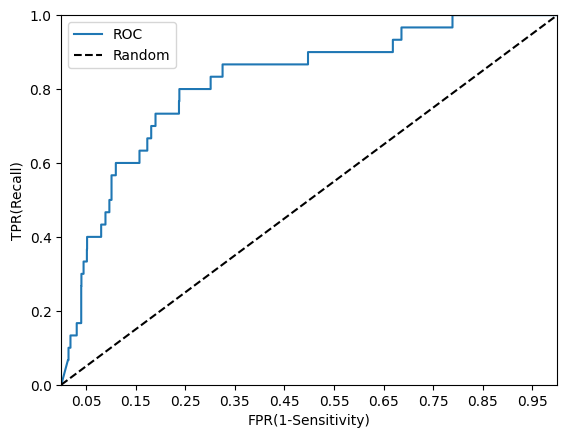

lda의 ROC AUC값: 0.8196


In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


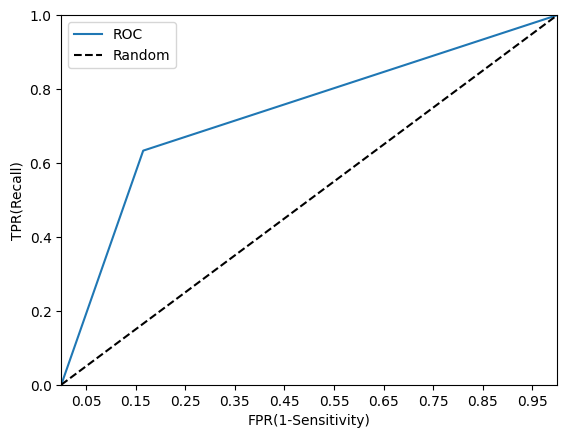

lda의 ROC AUC값: 0.7341


In [85]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

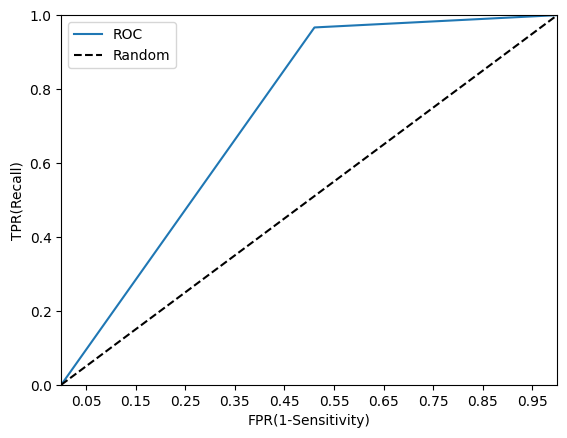

dt ROC AUC값: 0.7281


In [86]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


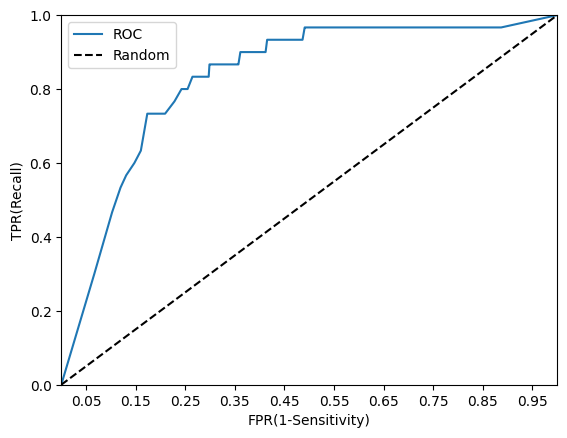

rf ROC AUC값: 0.8307


In [87]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

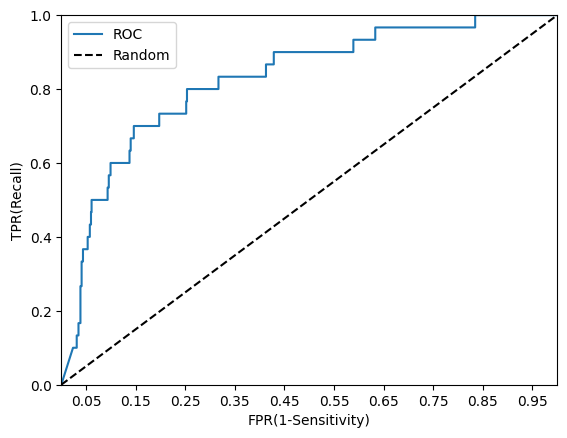

lr ROC AUC값: 0.8265


In [88]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


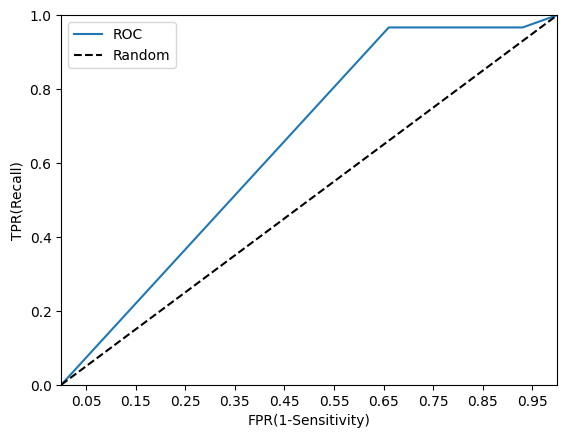

knn ROC AUC값: 0.6487


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [89]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))